In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.stats import poisson

from skimage import data_dir
from skimage.io import imread
from skimage.measure import compare_mse as mse
from skimage.measure import compare_psnr as psnr
from skimage.measure import compare_ssim as ssim
from skimage.transform import radon, iradon

# FBP

In [2]:
## DATA GENERATION
x = imread(data_dir + "/phantom.png", as_gray=True)
# THETA = np.linspace(0., 180., 400, endpoint=False)
THETA = np.linspace(0., 180., 16, endpoint=False)

sinogram = radon(x, THETA, circle=True).astype(np.float32)

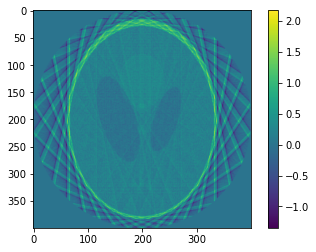

In [3]:
recon_fbp = iradon(sinogram, THETA, circle=True).astype(np.float32)
plt.imshow(recon_fbp)
plt.colorbar()

# OSEM

In [4]:
from OSEM import OSEM

## DATA GENERATION
x = imread(data_dir + "/phantom.png", as_gray=True)
THETA = np.linspace(0., 180., 400, endpoint=False)
# THETA = np.linspace(0., 180., 16, endpoint=False)

sinogram = radon(x, THETA, circle=True).astype(np.float32)

#sinogram = sinogram + np.random.normal(loc=0, scale=10, size=sinogram.shape)

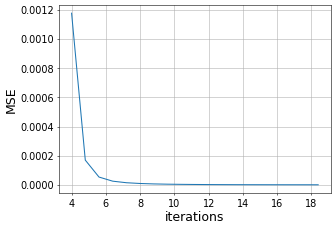

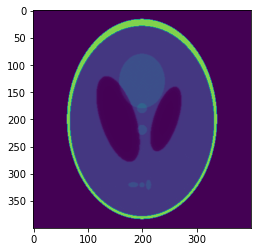

In [5]:
recon_osem = OSEM(x, sinogram, theta=THETA, n_iter = 20,n_sub=16)

plt.imshow(recon_osem)

# OSEM_TV

In [6]:
from OSEM_TV import OSEM_TV

## DATA GENERATIO
x = imread(data_dir + "/phantom.png", as_gray=True)
THETA = np.linspace(0., 180., 400, endpoint=False)

sinogram = radon(x, THETA, circle=True).astype(np.float32)

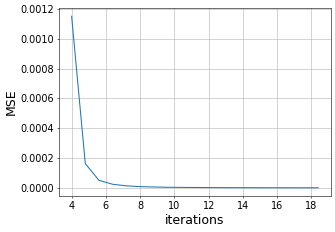

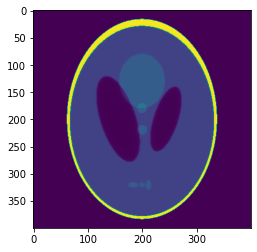

In [7]:
recon_osem_tv = OSEM_TV(x, sinogram, theta=THETA, n_iter = 20,n_sub=16)

plt.imshow(recon_osem_tv)

# SIRT

In [8]:
from SIRT import SIRT

## DATA GENERATION
x = imread(data_dir + "/phantom.png", as_gray=True)
THETA = np.linspace(0., 180., 400, endpoint=False)

sinogram = radon(x, THETA, circle=True).astype(np.float32)

/Users/light/anaconda3/lib/python3.7/site-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


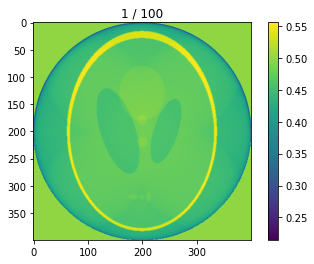

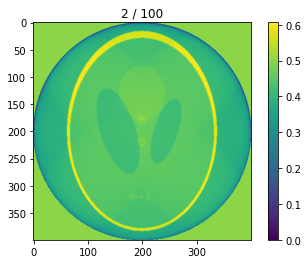

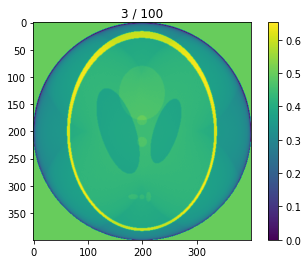

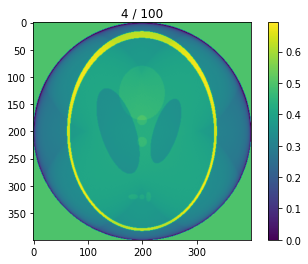

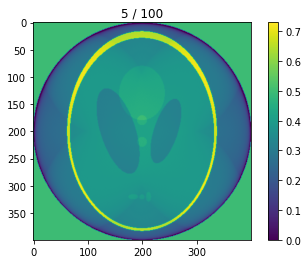

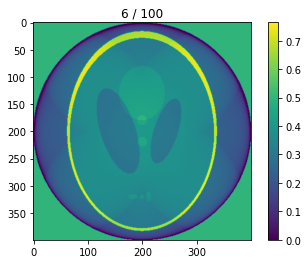

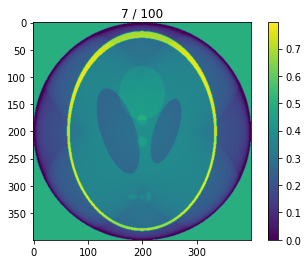

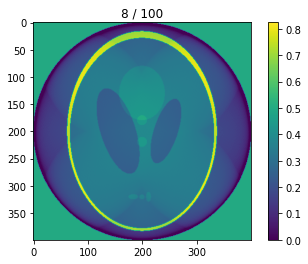

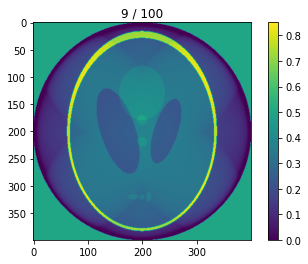

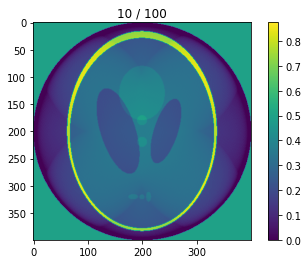

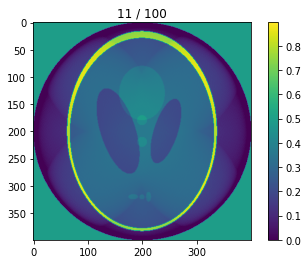

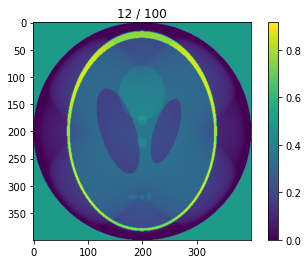

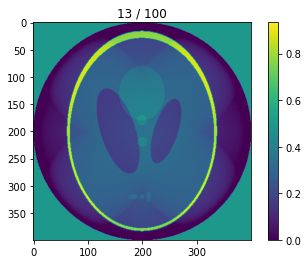

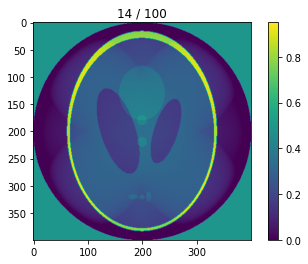

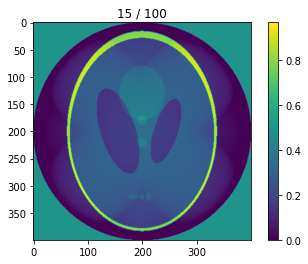

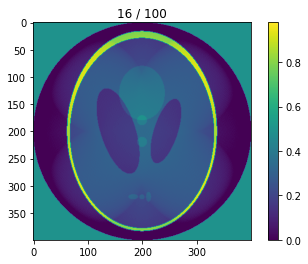

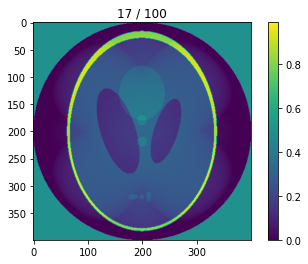

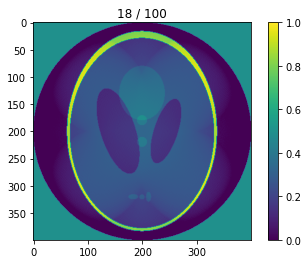

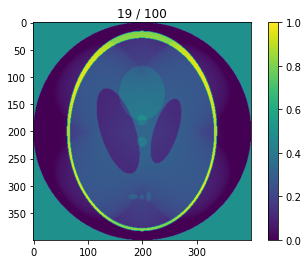

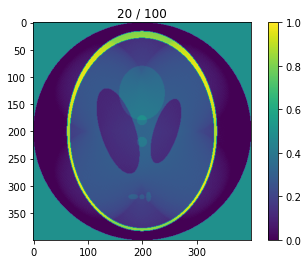

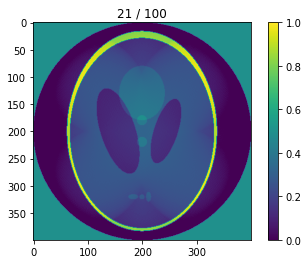

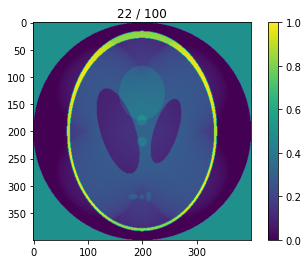

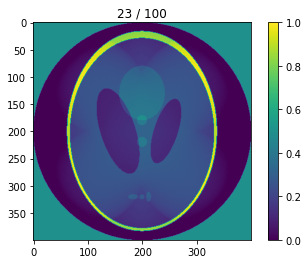

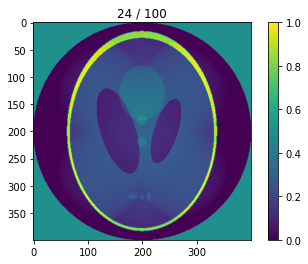

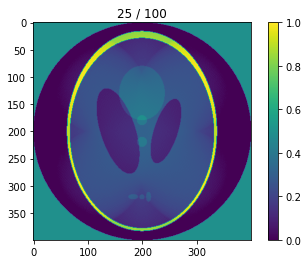

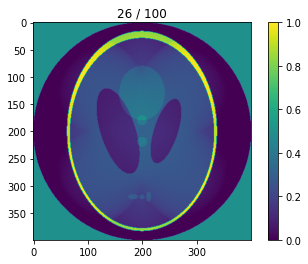

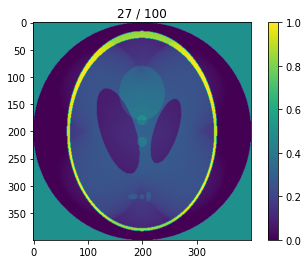

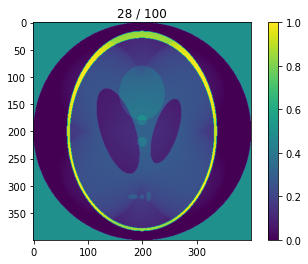

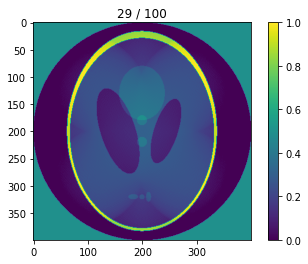

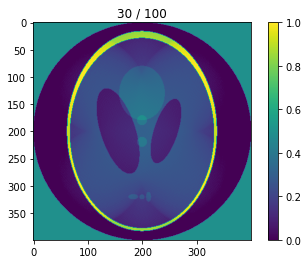

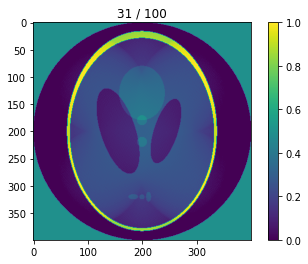

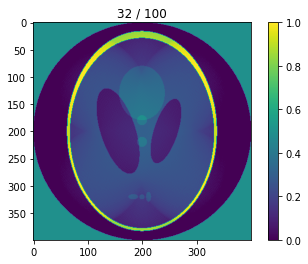

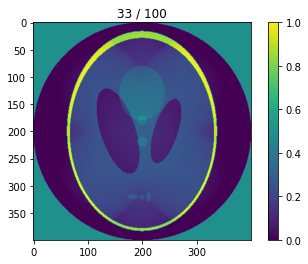

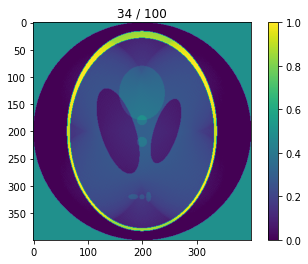

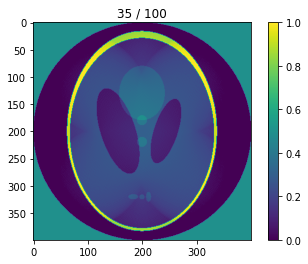

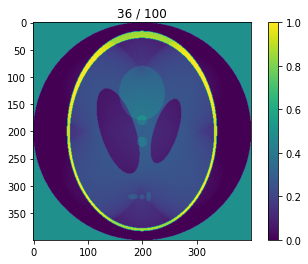

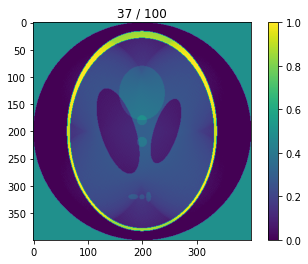

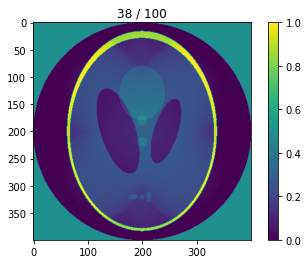

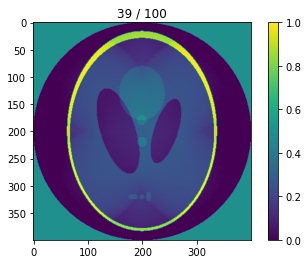

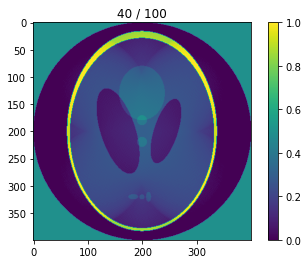

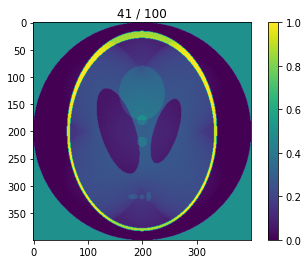

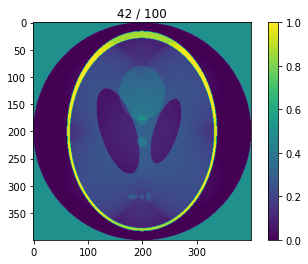

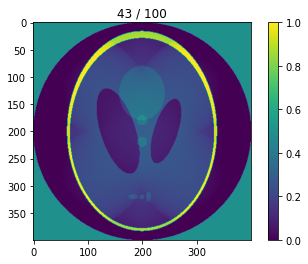

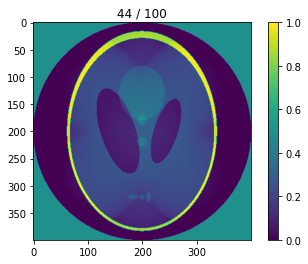

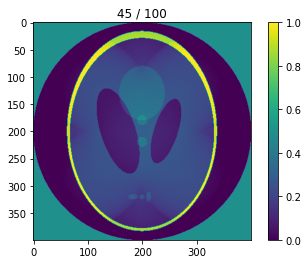

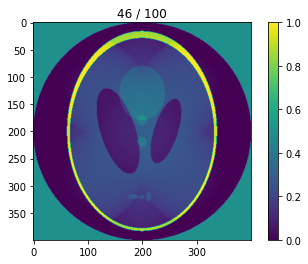

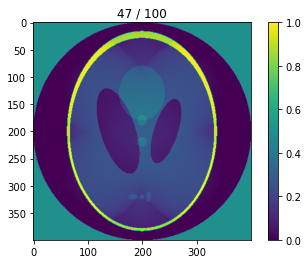

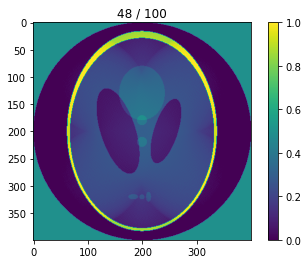

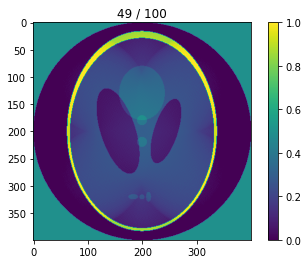

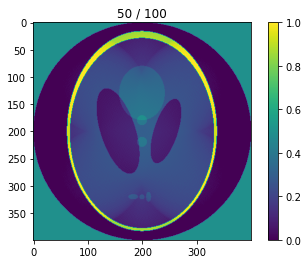

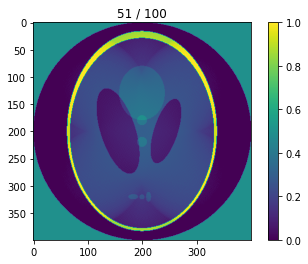

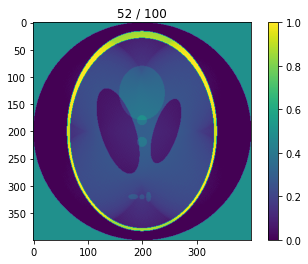

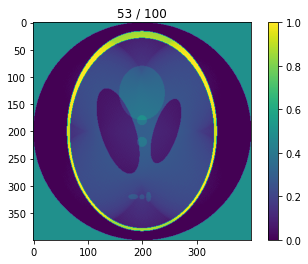

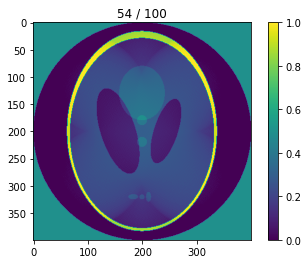

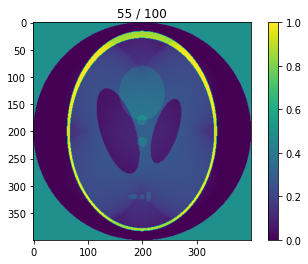

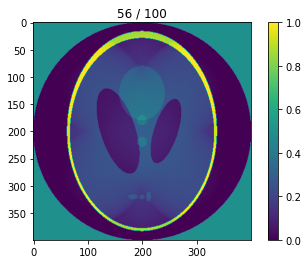

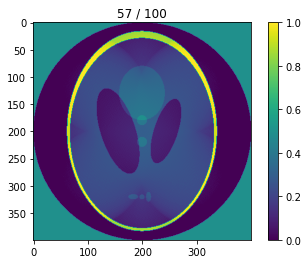

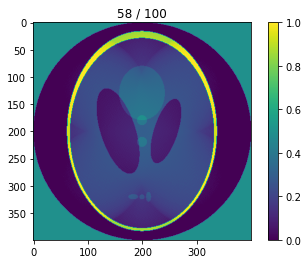

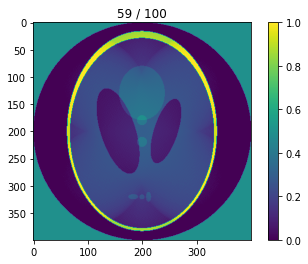

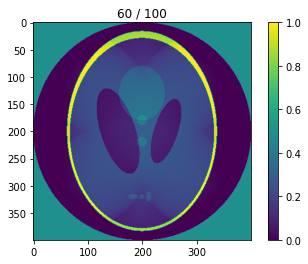

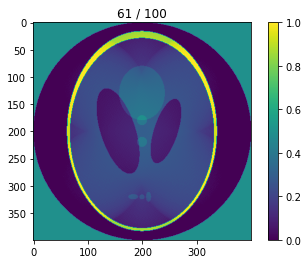

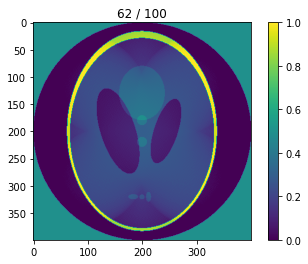

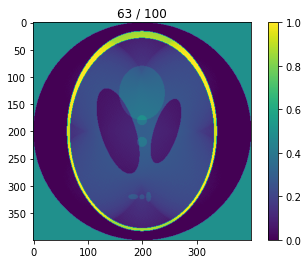

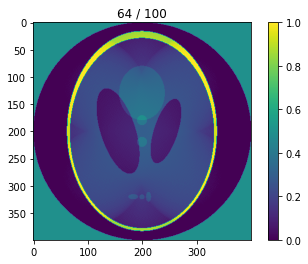

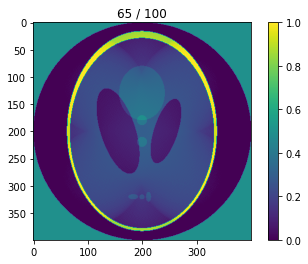

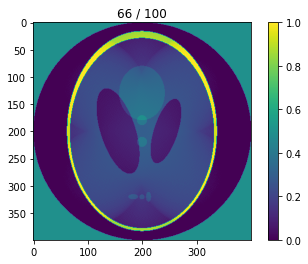

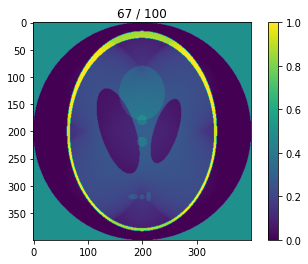

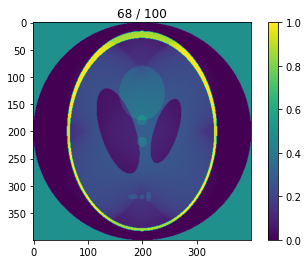

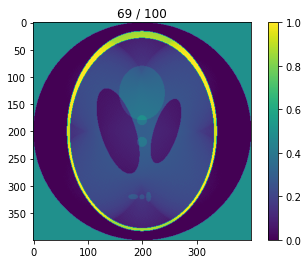

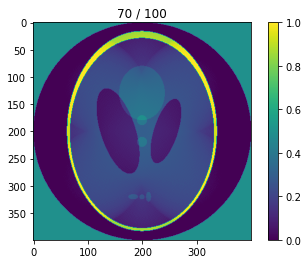

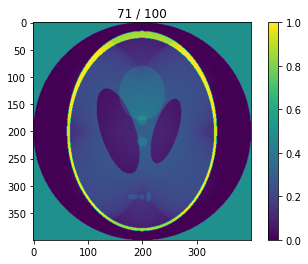

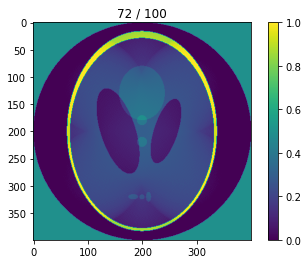

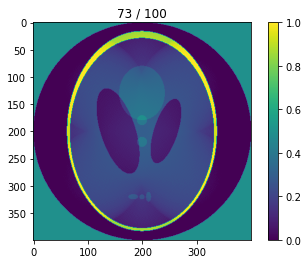

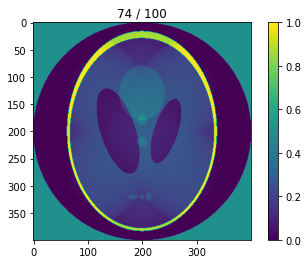

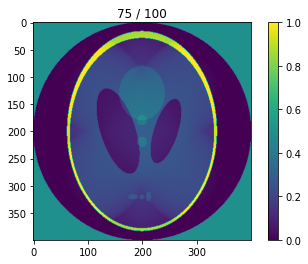

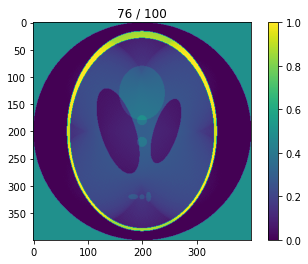

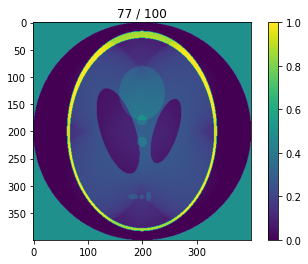

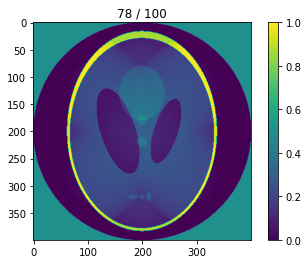

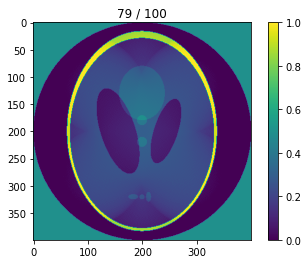

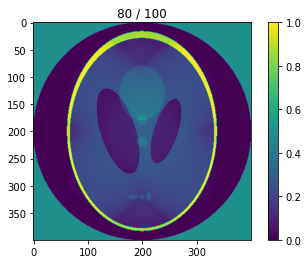

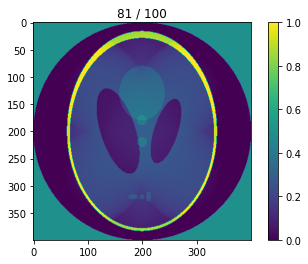

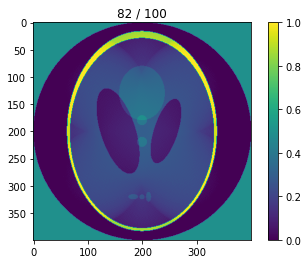

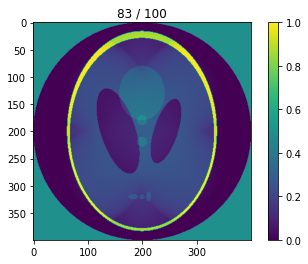

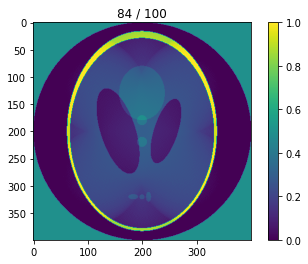

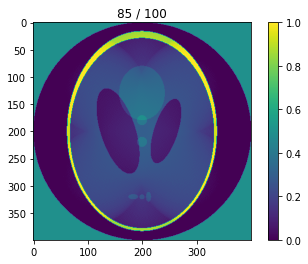

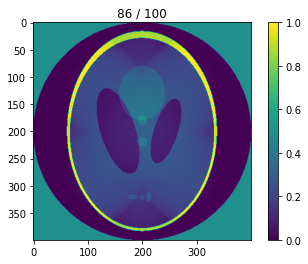

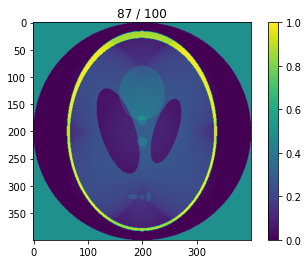

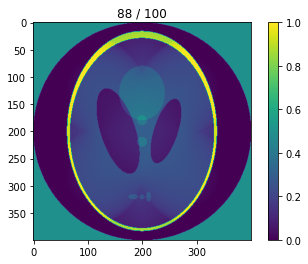

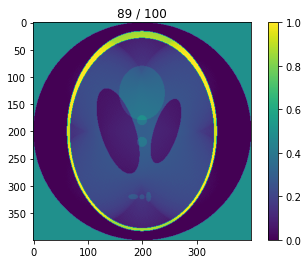

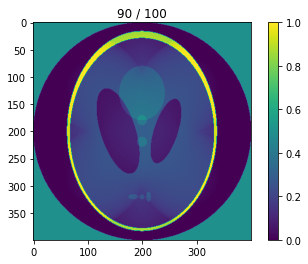

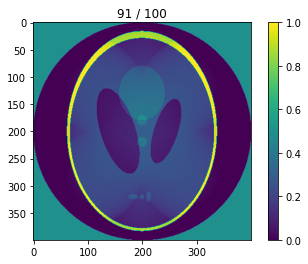

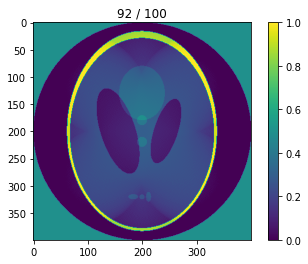

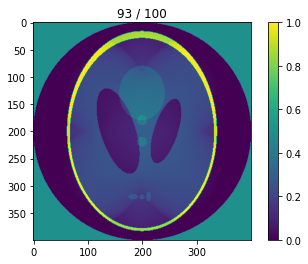

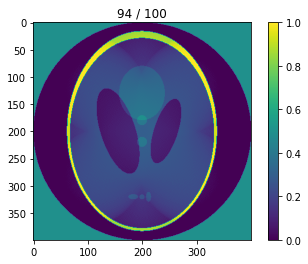

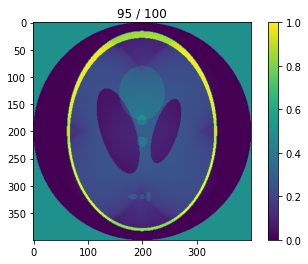

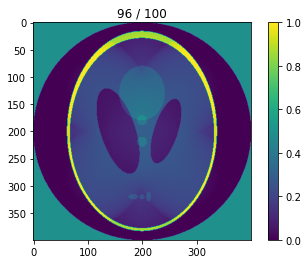

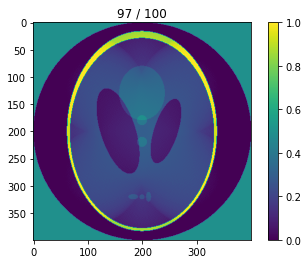

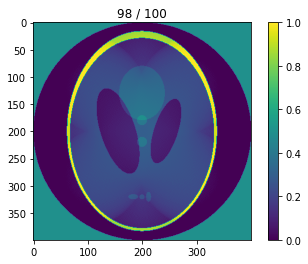

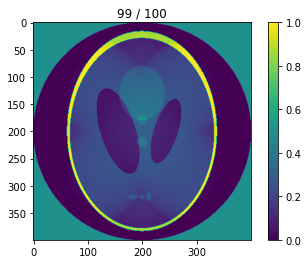

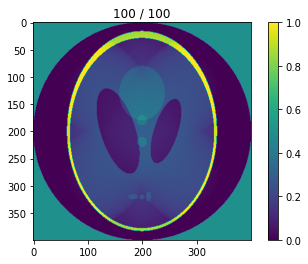

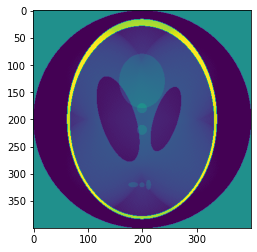

In [9]:
recon_img = SIRT(x, sinogram)

plt.imshow(recon_img)

# ART

In [10]:
from ART import ART

## DATA GENERATION
x = imread(data_dir + "/phantom.png", as_gray=True)
THETA = np.linspace(0., 180., 400, endpoint=False)
# THETA = np.linspace(0., 180., 16, endpoint=False)

sinogram = radon(x, THETA, circle=True).astype(np.float32)

/Users/light/anaconda3/lib/python3.7/site-packages/skimage/transform/radon_transform.py:284: RuntimeWarning: invalid value encountered in multiply
  projection = fft(img, axis=0) * fourier_filter


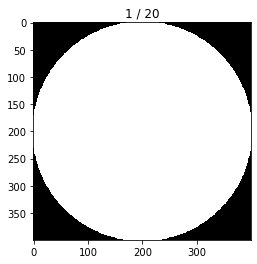

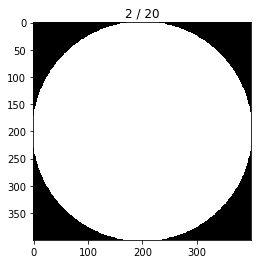

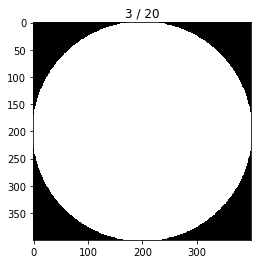

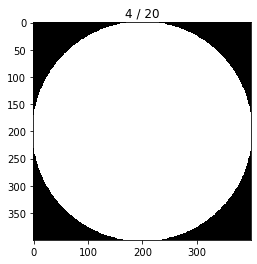

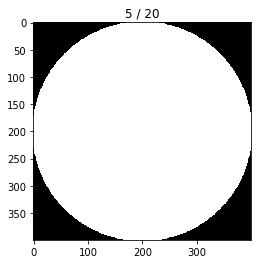

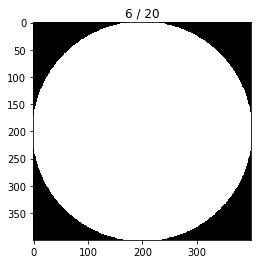

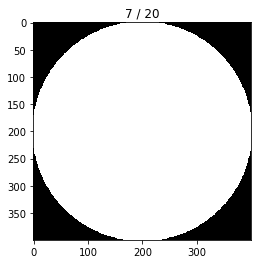

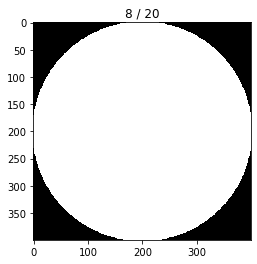

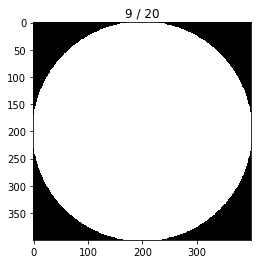

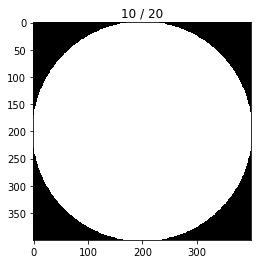

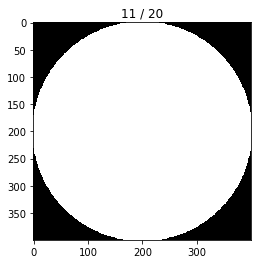

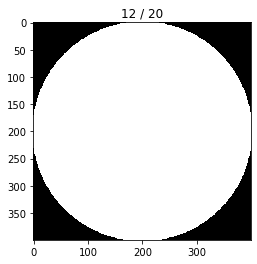

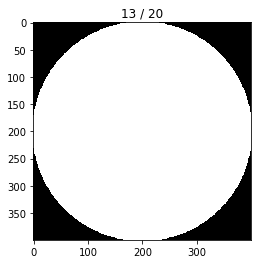

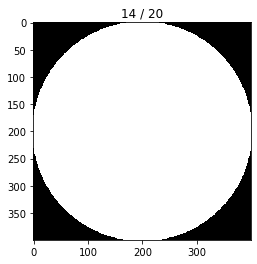

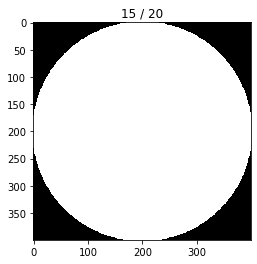

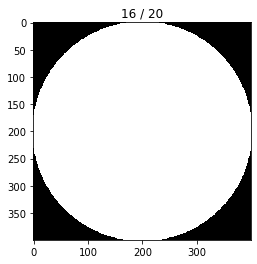

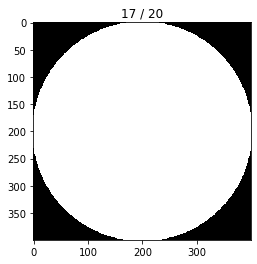

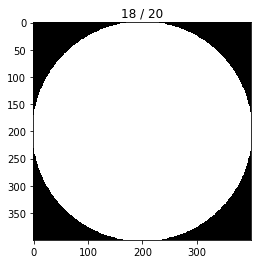

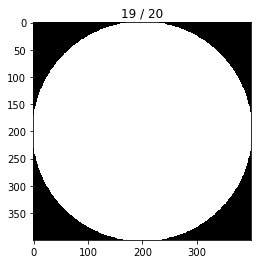

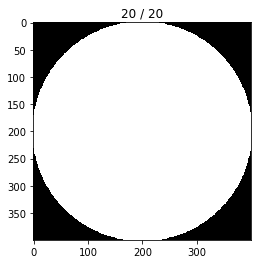

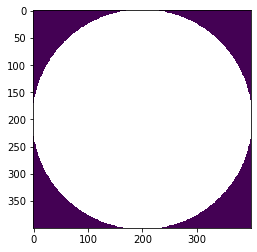

In [11]:
recon_art = ART(x, sinogram, theta=THETA, n_iter = 20)

plt.imshow(recon_art)